In [283]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [290]:
def pick_random(X, n):
    return X[np.random.randint(0,len(X), n)]

In [293]:
def is_maae(X):
    return np.unique(X, axis=0).shape[0] == X.shape[0]

In [312]:
def generate(n, l, d = 2):
    k = l+1 # Number of trajectory points
    directions = np.concatenate((np.identity(d), -np.identity(d))).astype(np.int8) # Possible movement

    # Generate MAs
    X = pick_random(directions, n*k) # Generate more because concatenation is more heavy
    X = X.cumsum(axis=0).reshape((n,k,d))
    X -= np.repeat(X[:,0,:] ,k, axis=0).reshape((n,k,d)) # Normalizing to (0,0)

    #Check if is MAAE
    is_maae_mask = np.zeros((n), dtype = np.bool)
    for i, x in enumerate(X):
        is_maae_mask[i] = is_maae(x)

    X_maae = X[is_maae_mask]
    return X_maae

## Taux d'acceptation

<IPython.core.display.Javascript object>


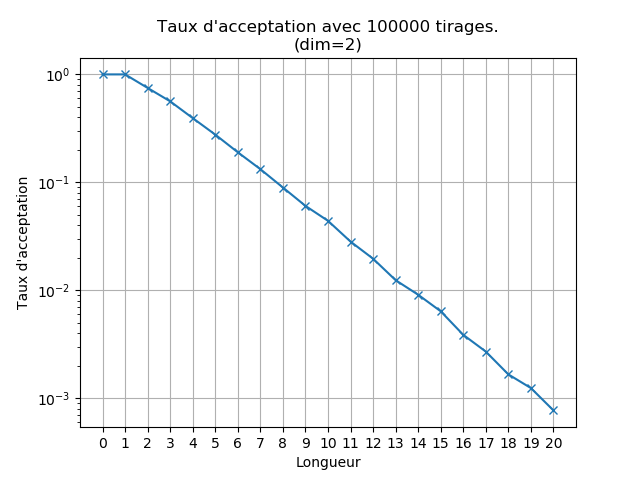

([<matplotlib.axis.XTick at 0x7f0bbcafcc50>,
 <a list of 21 Text xticklabel objects>)

In [328]:
plt.figure()
plt.grid()
plt.title("Taux d'acceptation avec " + str(n) +  " tirages.\n(dim="+str(d)+")")
plt.xlabel("Longueur")
plt.ylabel("Taux d'acceptation")
plt.xticks(range(0,L+1))

In [329]:
L, n = 20, 100000
L_accept_rate = np.ones(L+1)


for l in range(2,L+1):
    L_accept_rate[l] = generate(n,l).shape[0] / n
    
plt.semilogy(range(0, L+1), L_accept_rate, marker="x")